<h1 style="font-size:40px;"><center>Exercise I:<br> Backpropagation
</center></h1>


In [1]:
%load_ext autoreload
%autoreload 2

# Introduction

Welcome to the first lab for Deep Learning!

In this lab we will scratch the surface of pytorch and deep learning. Pytorch is a power tool for data scientists to train neural networks. Pytorch have a lot of features which can be used too train and create custom dataloaders, models and trainers in order to solve most problems related to neural networks.

For this lab all tasks include **TODO's** these are expected to be done before the deadline. At the end of the lab some questions shall be answered and what you have learned during the lab.

There is a file called config.py. This file contains most of the settings that is used during the lab. We wont use every setting at all time but the config help us to keep organised.

# Lab 1

In [16]:
# local modules
from dataset import ImageDataLoader 
from config import flying_objects_config

# Torch packages
import torch
import torch.nn as nn
import torch.nn.functional as F

## Load config

In [17]:
cfg = flying_objects_config()

## Define neural network

In order to create a neural network model we need to implement the following class which inherits nn.Module. 

The first example is a single perceptron with relu as activation function. Relu replaces the heaviside step function in order to make progress in the weight updates.

If we assume that the trainer uses CrossEntropyLoss from pytorch we do not need to define an activation function before the output since CrossEntropyLoss combines nn.LogSoftmax() and nn.NLLLoss().

In [18]:
# Example 1
class Perceptron(nn.Module):
    def __init__(self):
        super(Perceptron, self).__init__()
        self.fc = nn.Linear(1,1)
        self.relu = nn.ReLU() 
        
    def forward(self, x):
        x = x.view(x.size(0), -1) # Flatten
        output = self.fc(x)
        output = self.relu(x)
        return output

The second example is a feedforward network model which have 1 hidden layer. We can add additional hidden layers if we want. This is known as a deep/multilayer feedforward model or multilayer perceptron model (MLP)

In [5]:
# Example 2
class Feedforward(nn.Module):
        def __init__(self, input_size, output_size,hidden_size):
            super(Feedforward, self).__init__()
            self.fc1 = nn.Linear(input_size, hidden_size)
            self.relu = nn.ReLU()
            self.fc2 = nn.Linear(hidden_size, output_size)
            
        def forward(self, x):
            x = x.view(x.size(0), -1) # Flatten
            hidden = self.fc1(x)
            relu = self.relu(hidden)
            output = self.fc2(relu)
            return output

## Task 1
Extend the hidden_size until we see that the loss is going down.

Note: In order to test the model the training model needs to be implemented!

## Task 2
How did the prevous network perform? 
In this task increase the depht (more layers) of the network instead of the size of the hidden layer.

Note: In order to test the model the training model needs to be implemented!

In [6]:
class Task1(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        # TODO: Implement layers
        pass

    def forward(self, x):
        # TODO: Add layers that should be forwarded
        pass


## Setup Dataloader

In order to load data into training we need to introduce two new concepts. Pytorch have two classes: Dataset and DataLoader these two classes allow us to load data in a structured way. The Dataset contains our loading of data which is called upon during training. In order to create batches and shuffle dataset we use the DataLoader. 

The following example is how our data is loaded to training.

Below we show how we load the dataset and select appropriate transformations. 

Since the code is availible to us we only have to call upon our loaders.

In [7]:
dataset = ImageDataLoader(**cfg)
trainset = dataset.train_dataloader()
valset = dataset.validation_dataloader()
testset = dataset.test_dataloader()

## Plot a batch from dataset

In order to visualise the dataset we will use the function plot_grid_of_batch in order to plot the data of a batch. 

In [8]:
d = iter(trainset)

In [9]:
data,labels = next(d)

Labels tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0])


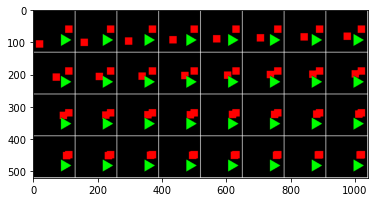

In [10]:
from utils import plot_grid_of_batch
plot_grid_of_batch(data)
print("Labels",labels)

## Learning framework

In this section we will create a learning framework or a **Training class**. The class consist of four methods to train our network. We will at first focus on the **fit** and **training_step** methods. 

The fit method will take care of our epochs and switching between training to validation. It also iterate our dataset which is then sent as batches to the training_step. 

The training_step consist of 4 stages:
1. Compute model's predictions (forward pass)
2. Compute the loss, using predictions, labels and a appropriate loss function
3. Compute the gradients for every parameter (backpropagation) 
4. Update the parameters

The validation_step consist of 2 stages:
1. Compute model's predictions (forward pass)
2. Compute the loss, using predictions, labels and a appropriate loss function

The evaluation function disables disables gradient updates in order to reduce memory consumption during validation. This is just for optimization.

The run_on_gpu function checks if an GPU is availible and if it is we want to use it. Note that we need to implement support for the GPU through cuda.

## Tasks

The following tasks will be done on the Training class below.

**Task 1:**

Implement the following in \__init__:
1. [ ] Criterion (loss)
2. [ ] Optimizer

**Task 2:**

1. [ ] Implement the TODO's in training step.
2. [ ] Check that the training is running on CPU

**Task 3:**
1. [ ] Implement the TODO's in validation step.
**Task 4:**

1. [ ] Change training step to run on gpu. 
    Hint: Convert the model first. Use self.device to get GPU setting.

In [13]:
#https://towardsdatascience.com/understanding-pytorch-with-an-example-a-step-by-step-tutorial-81fc5f8c4e8e#5017
class Training:
    def __init__(self, model):
        self.device = self.run_on_gpu()
        self.model = model
        self.criterion = # TODO
        self.optimizer = # TODO
        
   
    def training_step(self, data):
        #Run trainingset
        
        # Get input and target. Contains a minibatch!
        inputs, labels = data[0],data[1]
        
        # TODO: Set model in training mode
            
        # TODO: forward pass

        # TODO: Calculate loss

        # TODO: backward propagate

        # TODO: Gradient descent
        
        # TODO: Zero the parameter gradients
        
        
        return loss.item()
    
    def validation_step(self, data):   
        # Run validation set on data
        inputs, labels = data[0],data[1]
        
        # TODO: Set model in validation mode
        
        # TODO: forward pass
        
        # TODO: Calculate loss
        
        # Return loss
        return loss.item()
        
    def fit(self, trainset, valset=None, num_epochs=10):
        # Train the model. Run N numer of epochs on trainingset and at end of epoch run validation set. Print loss.
        for epoch in range(1,num_epochs+1):  
            num_steps = len(trainset)
            train_loss = 0
            
            # Iterate trainingset
            for step, data in enumerate(trainset, 1):
                train_loss += self.training_step(data)
                
                if step < num_steps:
                    print('[%d/%d, %d/%d] loss: %f' % (epoch,num_epochs,step,num_steps, (train_loss/step)), end="\r")
                else:
                    print('[%d/%d, %d/%d] loss: %f' % (epoch,num_epochs,step,num_steps, (train_loss/step)), end=" ")
    
            # Iterate validationset if it is availble
            if valset: 
                val_loss = self.evaluate(valset)
            
        print('Finished Training')
    
    def evaluate(self, dataset):
        # Method to evaluate our model on the validationset. This function is also used for the testset
        
        # Disable gradient updates since it is not needed (reduce memory consumption)
        val_loss = 0
        with torch.no_grad():
            # Iterate dataset
            for step, data in enumerate(dataset, 1):
                val_loss += self.validation_step(data)
            print('val_loss: %f' % (val_loss/len(dataset)))    
            
        return val_loss
    
    def run_on_gpu(self):
        # Check if gpu is availible. Print the results and return the selected device.
        print("GPU availible?", torch.cuda.is_available())
        return torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
        

## Run training

In [ ]:
# Start training
#model = Net(channels=cfg.IMAGE_CHANNEL, num_classes=cfg.NUM_CLASS)
model = Feedforward(3*128*128, cfg.NUM_CLASS, 2)
trainer = Training(model)
trainer.fit(dataset.train_dataloader(), dataset.validation_dataloader())

# The report!


## Name

## Introduction

## Questions

1. How did the training time change when moving to GPU?
2. What would happen if we remove the activation function from the Perceptron model? 
3. What is the purpose of the activation functions after each hidden layer?
4. What was the reason behind the choice of optimization and loss function?

5. Bonus task (not mandatory): Develop a network which can classify additional classes. (Enable fineGrained in config)

## Summary 